<a href="https://colab.research.google.com/github/Osakhra/ITAI2373-NewsBot-Final/blob/main/notebooks/04_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04_Sentiment_Analysis.ipynb

In this notebook, I will analyze the sentiment (positive, negative, or neutral) of news articles using the NewsBot 2.0 pipeline.

**Specifically, I will:**
- Import my cleaned news data
- Apply my custom SentimentAnalyzer to score each article’s sentiment
- Visualize how sentiment varies across news categories

---


In [1]:
!pip install langdetect spacy nltk scikit-learn pyldavis textblob transformers torch sumy sentence-transformers numpy matplotlib seaborn googletrans==4.0.0-rc1
import nltk
nltk.download('stopwords')
!git clone https://github.com/Osakhra/ITAI2373-NewsBot-Final.git
import sys
sys.path.append('/content/ITAI2373-NewsBot-Final/src')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of gensim to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.4 M

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Cloning into 'ITAI2373-NewsBot-Final'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 206 (delta 17), reused 6 (delta 6), pack-reused 170 (from 1)
Receiving objects: 100% (206/206), 174.26 KiB | 4.36 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [2]:
from google.colab import files
uploaded = files.upload()  # Upload your latest processed news CSV (should have 'clean_content')


Saving BBC News Train.csv to BBC News Train.csv


In [3]:
import pandas as pd
df = pd.read_csv('BBC News Train.csv')  # Or your current cleaned CSV
df = df.rename(columns={'Text': 'content', 'Category': 'category'})  # Only if not already standardized
# If you don't already have 'clean_content', run the preprocessor again as before.


In [5]:
from data_processing.text_preprocessor import TextPreprocessor

pre = TextPreprocessor()
df['clean_content'] = df['content'].apply(pre.preprocess)


In [6]:
from analysis.sentiment_analyzer import SentimentAnalyzer

analyzer = SentimentAnalyzer()
# Get sentiment for each article (polarity and subjectivity)
df['sentiment'] = df['content'].apply(lambda text: analyzer.analyze(text)['polarity'])
df['sentiment_label'] = df['sentiment'].apply(analyzer.label_sentiment)
df[['content', 'sentiment', 'sentiment_label']].head()

,content,sentiment,sentiment_label
0,worldcom ex-boss launches defence lawyers defe...,0.023320,neutral
1,german business confidence slides german busin...,0.077917,neutral
2,bbc poll indicates economic gloom citizens in ...,0.077754,neutral
3,lifestyle governs mobile choice faster bett...,0.156109,positive
4,enron bosses in $168m payout eighteen former e...,0.009685,neutral


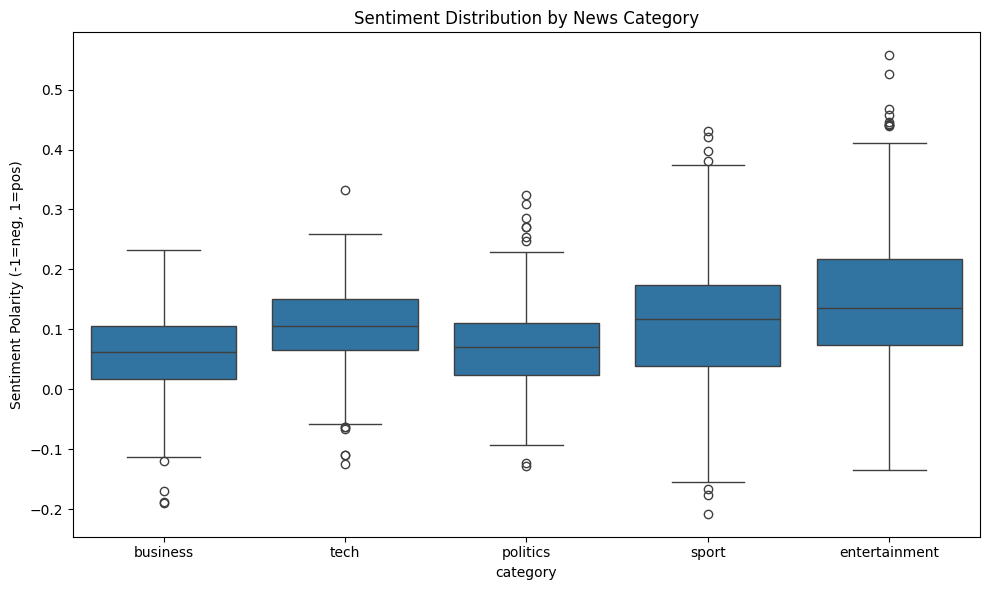

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='sentiment')
plt.title("Sentiment Distribution by News Category")
plt.ylabel("Sentiment Polarity (-1=neg, 1=pos)")
plt.tight_layout()
plt.show()


In [8]:
print(df.groupby('category')['sentiment_label'].value_counts().unstack())


sentiment_label  negative  neutral  positive
category                                    
business                7      238        91
entertainment           1       98       174
politics                2      187        85
sport                  11      142       193
tech                    3      119       139


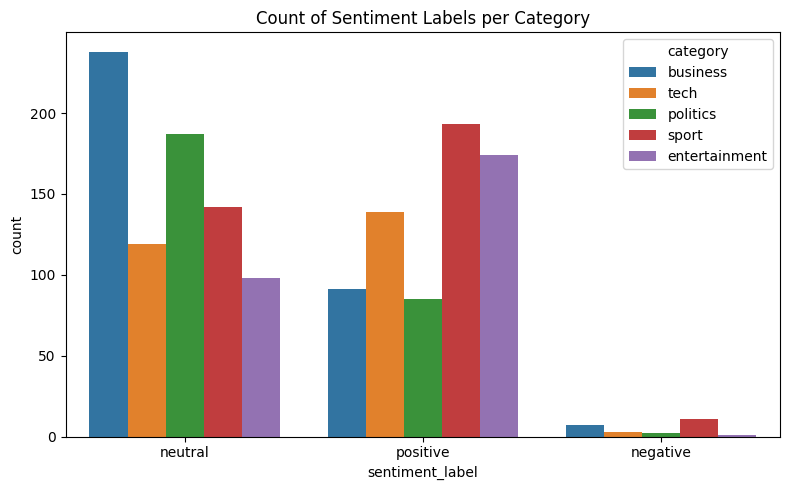

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment_label', hue='category')
plt.title("Count of Sentiment Labels per Category")
plt.tight_layout()
plt.show()
